In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt #2d plot

# Task1

## Define functions

### Define Lorenz96 model

In [2]:
def Lorenz(X, F):
    dXdt = np.array([])
    for i in xrange(len(X)):
        # assume Periodic boundary condition
        diff = (-X[i-2]*X[i-1]+X[i-1]*X[(i+1)%len(X)]-X[i]+F)
        dXdt = np.append(dXdt, diff)
    dXdt = dXdt.reshape((len(dXdt),1))
    return dXdt

### Define runge_kutta solver

In [3]:
def time_step(X,dt, model=None):
    k1 = dt*Lorenz(X, F)
    k2 = dt*Lorenz(X+k1/2, F)
    k3 = dt*Lorenz(X+k2/2, F)
    k4 = dt*Lorenz(X+k3, F)
    return X + (k1/6 + k2/3 + k3/3 + k4/6)

### Define simulator

In [4]:
def run_simulation(X0, step, dt, model=None):
    trajectory = np.array(X0)
    X =  np.array(X0)
    for t in xrange(step):
        X = time_step(X, dt)
        trajectory = np.concatenate((trajectory, X),axis=1)     
    return trajectory

## Run simulator

In [5]:
#define setting
dt = 0.005
step = 5000

#define parameters
F = 8.000
d=40

#define initial state (white noise) 
#X0 = np.random.rand(d, 1)
X0 = np.zeros((d, 1))

# Run simulation
data = run_simulation(X0, step, dt)

## Visualize results 

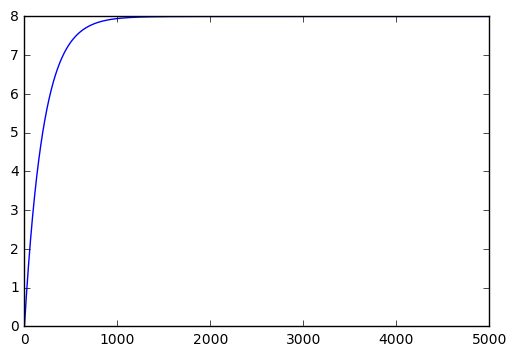

In [7]:
plt.plot(data[1,:])

# Task2

## 誤差の平均発達率を調べる(F=8)

x0乱数なのは良くない．解の空間に落とさないといけない→十分に長い時間シミュレーションするとモデルの解の空間に落ちるので，そこからランダムにサンプリングする．

### 解空間上の軌跡を読み込む

In [ ]:
trajectory = np.load('data_raw.npy')

### エラーの時間変化を取る

In [ ]:
sample = 100
steps = 2000

errors = np.array([])
for n in xrange(sample):
    #define initial state
    X0 = np.random.rand(d, 1)
    X1 = X0 + 1e-7*np.random.rand(d, 1)

    # Run simulation
    data0 = run_simulation(X0, steps, dt)
    data1 = run_simulation(X1, steps, dt)
    error  = np.sqrt(np.sum(np.power(data0-data1, 2),axis=0))
    errors = np.append(errors, error)

errors = errors.reshape(sample, data0.shape[1])

In [ ]:
np.save('errors.npy', errors)

## 10000step分plot

In [ ]:
plt.plot(errors[0])

## 2000step × 100 sample走らせて，リアプノフ指数を求めた

In [ ]:
logE = np.log2(np.mean(errors,axis=0))
Var = np.var(errors,axis=0)

### y=ax+bをlog2(Mean)に線形回帰し，傾きを求めた

In [ ]:
x=np.array(range(len(logE)))
A = np.array([x,np.ones(len(x))])
A = A.T
a,b = np.linalg.lstsq(A,logE)[0]
print "a: ", a
print "b: ", b

### log2(Mean)とy=0.013x-21 をプロットした

In [ ]:
plt.plot(x,logE)
plt.plot(x,(a*x+b))
plt.grid()
plt.show()

## 自然界のEDT=2dayとして，シミュレーションの時間スケールを推定

In [ ]:
print "dt:  ", dt
print "steps/day (truth)        :  ", 0.4/dt
print "steps/day (estimated):  ", round(1/a,1)

# Task3

## 2 年分積分し、後半 1 年分を 6 時間毎に保存

### Run simulator

In [5]:
#define setting
dt = 0.005
step = 365*4*2*10

#define parameters
F = 8.000
d=40

#define initial state (white noise) 
X0 = np.random.rand(d, 1)

# Run simulation
data = run_simulation(X0, step, dt)

In [13]:
data_test = data[:,-30:]
np.save('data_test.npy', data_test)

In [8]:
data_c = data[:,data.shape[1]/2:]
np.save('data_raw.npy', data_c)

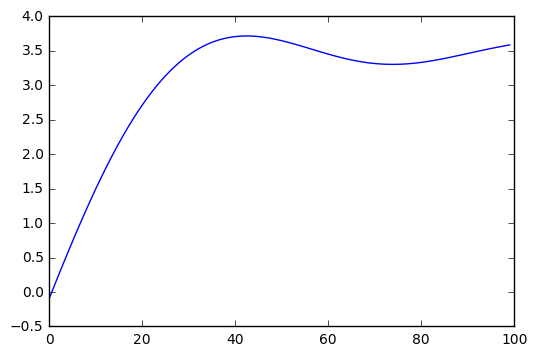

In [12]:
plt.plot(data_c[0,-100:])

### 6時間ごとにサンプル

In [ ]:
data_sampled = data_c[:,::10]
np.save('data_sampled.npy', data_sampled)

# Task4

## 3のデータに分散1のノイズを加える

In [5]:
data=np.load('data_sampled.npy')

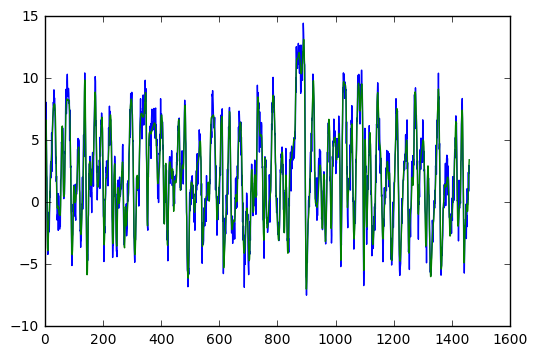

In [6]:
noise = np.random.randn(data.shape[0],data.shape[1])
data_obs = data+noise
np.save('data_obs.npy', data_obs)

plt.plot(data_obs[0])
plt.plot(data[0])